In [63]:
import numpy as np 
import pandas as pd 

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm

In [64]:
salary_dataset = pd.read_csv("C:/Users/RAMU NAIDU/Desktop/EDA project/adult.csv")

In [65]:
df = pd.DataFrame(salary_dataset)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [67]:
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [68]:
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [69]:
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [70]:
df.dropna(how='any',inplace=True)

In [71]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
86       1
87       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
556660     1
340043     1
337992     1
124818     1
65584      1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

In [72]:
df.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [73]:
df

,workclass,education,marital,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,<=50K
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,<=50K


### So from the above data we observe that all the data available is i categorical form, but for a ML model to get trained we need to have it in numerical form- so we try to covert all the categorical data of evry column to numerical data by putting some numbers in place of the words

In [74]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [75]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [76]:
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [77]:
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [78]:
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [79]:
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [80]:
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9, 'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

In [81]:
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

## This is the final numerical output we needed

In [82]:
df

,workclass,education,marital,occupation,relationship,race,gender,income
0,5,11,5,6,5,0,0,0
1,5,3,2,1,4,3,0,0
2,4,9,2,14,4,3,0,1
3,5,0,2,6,4,0,0,1
5,5,13,5,13,0,3,0,0
...,...,...,...,...,...,...,...,...
48837,5,9,2,2,1,3,1,0
48838,5,3,2,6,4,3,0,1
48839,5,3,1,3,3,3,1,0
48840,5,3,5,3,5,3,0,0


## To see the relation between every column and income attribute

<AxesSubplot:xlabel='education'>

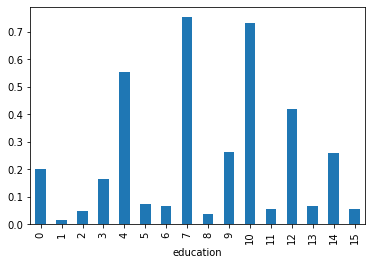

In [83]:
df.groupby('education').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

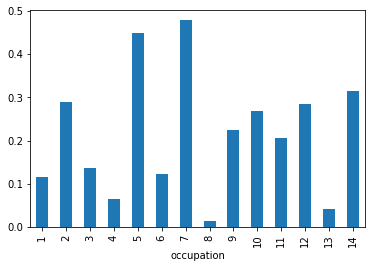

In [84]:
df.groupby('occupation').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

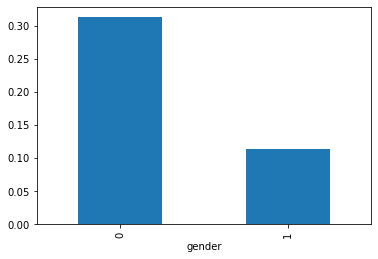

In [85]:
df.groupby('gender').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

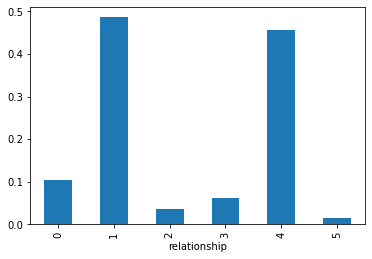

In [87]:
df.groupby('relationship').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='race'>

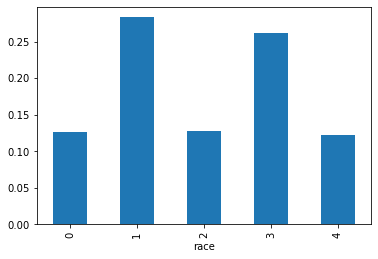

In [88]:
df.groupby('race').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

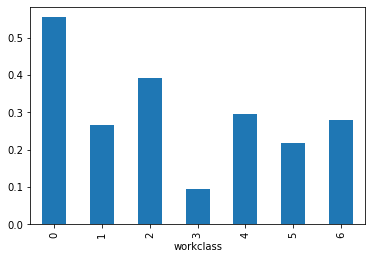

In [89]:
df.groupby('workclass').income.mean().plot(kind='bar')

### Preparing the X-axis

In [90]:
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])

### Preparing the Y-axis

In [91]:
df_y = pd.DataFrame(df.income)

In [92]:
reg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [93]:
reg.fit(x_train, y_train)

C:\Users\RAMU NAIDU\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [60]:
y_pred = reg.predict(x_test)

### predict function with our test values in the format 
[['relationship','education','race','occupation','gender','marital','workclass']]

In [61]:
reg.predict([[1,7,3,7,0,2,0]])

array([1])

### There we have our predicted value. As we assumed that a person’s income will be more than 50K if the relationship status is either 1 or 4, education is 7 or 10, the race is 1 or 3, occupation is 5 or 7, gender is male i.e 0, marital status is 2 or 6 and workclass is 0 or 2. So, our has correctly predicted that a person with these features will surely be able to earn more than 50K and returned a prediction value of 1.

In [62]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7603189493433395


### accuracy value of 76% which is good for any machine learning prediction model